# Overview
> In this Ipython notebook, I will classify Iris flower species from Iris flower dataset. This dataset has four features and three labels. Given these four features, we have to predict flower labels. I will use logistic regression for this classification problem. This post is written for beginners who wants learn logistic regression in Tensorflow. Without further talking let's jump into the code.

# Let's grab necessary dependencies for this project

In [1]:
# pandas for handling our data
import pandas as pd
# matplotlib and seaborn for visualize our data
import matplotlib.pyplot as plt
import seaborn as sns
# numpy for numeric operations
import numpy as np
# tensorflow! our machine learning library
import tensorflow as tf
# train_test_split from sklearn for splitting our data into train and test set
from sklearn.model_selection import train_test_split
# OneHotEncoder from sklearn for converting features and labels to one-hot encoding
from sklearn.preprocessing import OneHotEncoder
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend. 
%matplotlib inline

# Load the data into Pandas dataframe object

In [2]:
# load the data
df = pd.read_csv('../input/Iris.csv')
# print some of data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Analyze the data

In [3]:
# how many data in each species
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


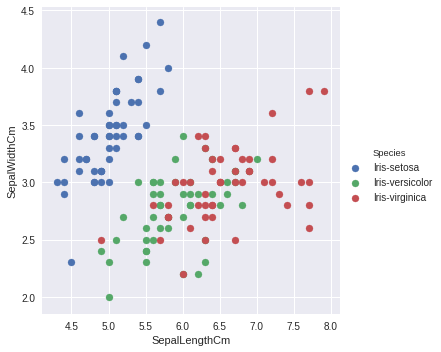

In [5]:
# let's visualize the data with sepalLength and sepalWidth 
sns.FacetGrid(df, hue='Species', size=5).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

# Data Pre-processing

In [6]:
# let's drop Id column because we don't need it
df = df.drop('Id', axis=1)
# convert Species name to numerical value
# Iris setosa = 1
# Iris versicolor = 2
# Irsi virginica = 3
df['Species'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor','Iris-virginica'], [1, 2, 3])
# now let's print some of the data
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
# X is our features ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')
X = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# y is our labels
y = df.loc[:, ['Species']]

#### Convert our features and labels to one-hot encoding
> Why One-Hot encoding? See this blog post https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [8]:
# declare OneHotEncoder from sklearn
oneHot = OneHotEncoder()
# fit our X to oneHot encoder 
oneHot.fit(X)
# transform
X = oneHot.transform(X).toarray()
# fit our y to oneHot encoder
oneHot.fit(y)
# transform
y = oneHot.transform(y).toarray()

print("Our features X in one-hot format")
print(X)

Our features X in one-hot format
[[ 0.  1.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  1.  0.]]


In [9]:
# let's split our data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)
# let's print shape of each train and testing
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train:  (135, 15)
Shape of y_train:  (135, 3)
Shape of X_test:  (15, 15)
Shape of y_test (15, 3)


# Let's build our model

In [10]:
# hyperparameters
learning_rate = 0.0001
num_epochs = 1500
display_step = 1

# for visualize purpose in tensorboard we use tf.name_scope
with tf.name_scope("Declaring_placeholder"):
    # X is placeholdre for iris features. We will feed data later on
    X = tf.placeholder(tf.float32, [None, 15])
    # y is placeholder for iris labels. We will feed data later on
    y = tf.placeholder(tf.float32, [None, 3])
    
with tf.name_scope("Declaring_variables"):
    # W is our weights. This will update during training time
    W = tf.Variable(tf.zeros([15, 3]))
    # b is our bias. This will also update during training time
    b = tf.Variable(tf.zeros([3]))
    
with tf.name_scope("Declaring_functions"):
    # our prediction function
    y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

In [11]:
with tf.name_scope("calculating_cost"):
    # calculating cost
    cost = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_)
with tf.name_scope("declaring_gradient_descent"):
    # optimizer
    # we use gradient descent for our optimizer 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# It's training time

In [12]:
with tf.name_scope("starting_tensorflow_session"):
    with tf.Session() as sess:
        # initialize all variables
        sess.run(tf.global_variables_initializer())
        for epoch in range(num_epochs):
            cost_in_each_epoch = 0
            # let's start training
            _, c = sess.run([optimizer, cost], feed_dict={X: X_train, y: y_train})
            cost_in_each_epoch += c
            # you can uncomment next two lines of code for printing cost when training
            #if (epoch+1) % display_step == 0:
                #print("Epoch: {}".format(epoch + 1), "cost={}".format(cost_in_each_epoch))
        
        print("Optimization Finished!")

        # Test model
        correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
        # Calculate accuracy for 3000 examples
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print("Accuracy:", accuracy.eval({X: X_test, y: y_test}))

Optimization Finished!
Accuracy: 1.0


# Conclusion
> Yes! We came to the end. Thanks for reading this notebook. 